In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
from supervised.automl import AutoML
import category_encoders as ce
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.metrics import median_absolute_error
print('Imported sci-kit learn and AutoML libraries!')

Imported sci-kit learn and AutoML libraries!


## Let's compare some other AutoML libraries to see if we can improve our results any further

- We will try the AutoViml library on our Dublin data here.
- We can compare different AutoML approaches in our findings then.

In [2]:
irl =  pd.read_csv('sub-dub-encoded.csv', index_col = 'Unnamed: 0')

In [3]:
irl1 = pd.read_csv('initial-ml-test-dub-1.csv', index_col = 'Unnamed: 0')

In [4]:
irl1.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,3.568079
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,0.255856
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,3.002563
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,1.206681
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,1.815296


In [5]:
irl.drop(columns = ['Longitude', 'Latitude', 'LogPrice (€)'], inplace = True)

In [6]:
irl1.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,3.568079
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,0.255856
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,3.002563
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,1.206681
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,1.815296


In [7]:
irl.head()

,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,Eircode,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool
207901,0,1,2014,1,601864.418417,0,899721.0,628715.337138,7.541595,0.492120,1.438826,0.156609
207905,1,0,2014,1,651335.338306,0,1661424.0,651335.338306,6.817210,0.100996,2.784711,0.831639
207916,0,1,2014,1,741771.837018,1,597863.0,628715.337138,7.799393,0.683556,3.098765,0.968202
207925,1,1,2014,1,414681.974545,0,334587.0,406163.221538,8.400802,0.319564,1.909348,0.262801
207929,1,2,2014,1,570683.081926,1,305308.0,411979.725512,2.225835,0.085034,0.909828,0.597393


In [8]:
irl = irl.join(irl1[['Longitude', 'Latitude', 'Price (€)']])

In [9]:
# predicting standard
irl['LogPrice (€)'] = np.log(irl['Price (€)'])
irl.drop(columns = ['Price (€)'], inplace = True)
irl.head()

,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,Eircode,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool,Longitude,Latitude,LogPrice (€)
207901,0,1,2014,1,601864.418417,0,899721.0,628715.337138,7.541595,0.492120,1.438826,0.156609,-6.335665,53.307878,13.010761
207905,1,0,2014,1,651335.338306,0,1661424.0,651335.338306,6.817210,0.100996,2.784711,0.831639,-6.238896,53.288227,12.894207
207916,0,1,2014,1,741771.837018,1,597863.0,628715.337138,7.799393,0.683556,3.098765,0.968202,-6.312400,53.291600,12.186050
207925,1,1,2014,1,414681.974545,0,334587.0,406163.221538,8.400802,0.319564,1.909348,0.262801,-6.372213,53.353853,11.461632
207929,1,2,2014,1,570683.081926,1,305308.0,411979.725512,2.225835,0.085034,0.909828,0.597393,-6.263792,53.366311,11.931636


In [10]:
# this function finds all values that fall within internationally accepted +-10% of actual prices in our predictions
# we can modify the threshold as we feel the need to here
def accuracy_threshold(test, pred, num):
    test = np.array(test)
    pred = np.array(pred)
# get within x% of actual price , not within log price as this will be misleading / incorrect
    test = np.exp(test)
    pred = np.exp(pred)
    count = 0
    for i in range(len(pred)):
        if test[i] != 0:  
            ten = test[i] * num
            res = test[i] - pred[i]
        else:
            res = 0
            ten = 0
        
        if res < 0:
            res = res * -1
        else:
            res = res
            
        if res <= ten:
            count += 1
        else:
            continue
    return (count / len(test))

In [11]:
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold

## 2021

In [12]:
specific21 = irl[irl['Year'] > 2017]

In [13]:
train_21 = specific21[specific21['Year'] < 2021]

In [14]:
test_21 = specific21[specific21['Year'] == 2021]

In [15]:
x_train_21 = train_21.loc[:, train_21.columns != 'LogPrice (€)']
y_train_21 = train_21['LogPrice (€)']

In [16]:
x_test_21 = test_21.loc[:, test_21.columns != 'LogPrice (€)']
y_test_21 = test_21['LogPrice (€)']

### 2020

In [17]:
specific20 = irl[irl['Year'] > 2016]

In [18]:
test_20 = specific20[specific20['Year'] == 2020]
train_20 = specific20[specific20['Year'] < 2020]

x_train_20 = train_20.loc[:, train_20.columns != 'LogPrice (€)']
y_train_20 = train_20['LogPrice (€)']

x_test_20 = test_20.loc[:, test_20.columns != 'LogPrice (€)']
y_test_20 = test_20['LogPrice (€)']

### 2019

In [19]:
specific19 = irl[irl['Year'] > 2015]

In [20]:
test_19 = specific19[specific19['Year'] == 2019]
train_19 = specific19[specific19['Year'] < 2019]
x_train_19 = train_19.loc[:, train_19.columns != 'LogPrice (€)']
y_train_19 = train_19['LogPrice (€)']
x_test_19 = test_19.loc[:, test_19.columns != 'LogPrice (€)']
y_test_19 = test_19['LogPrice (€)']

### 2018

In [21]:
specific18 = irl[irl['Year'] > 2014]
test_18 = specific18[specific18['Year'] == 2018]
train_18 = specific18[specific18['Year'] < 2018]

x_train_18 = train_18.loc[:, train_18.columns != 'LogPrice (€)']
y_train_18 = train_18['LogPrice (€)']
x_test_18 = test_18.loc[:, test_18.columns != 'LogPrice (€)']
y_test_18 = test_18['LogPrice (€)']

### 2017

In [22]:
specific17 = irl[irl['Year'] > 2013]
test_17 = specific17[specific17['Year'] == 2017]
train_17 = specific17[specific17['Year'] < 2017]

x_train_17 = train_17.loc[:, train_17.columns != 'LogPrice (€)']
y_train_17 = train_17['LogPrice (€)']
x_test_17 = test_17.loc[:, test_17.columns != 'LogPrice (€)']
y_test_17 = test_17['LogPrice (€)']

### AutoKeras

In [23]:
import autokeras as ak
# It tries 10 different models.
#y_train_21_pd = pd.DataFrame(y_train_21)
#reg = ak.StructuredDataRegressor(max_trials = 10, loss = 'mean_absolute_error')
# Feed the structured data regressor with training data.
#reg.fit(x_train_21, y_train_21_pd, epochs = 50)
# Predict with the best model.
#print(reg.evaluate(x_test_21, y_test_21))

In [24]:
#predicted_21 = reg.predict(x_test_21)
#y_test_21_pd = pd.DataFrame(y_test_21)
#accuracy_threshold(y_test_21, predicted_21, 0.1)

### AutoViml

In [25]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


## 2021

In [26]:
target = 'LogPrice (€)'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2226, 15)
    Training Set Memory Usage = 0.27 MB
Test Set Shape = (591, 15)
    Test Set Memory Usage = 0.07 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

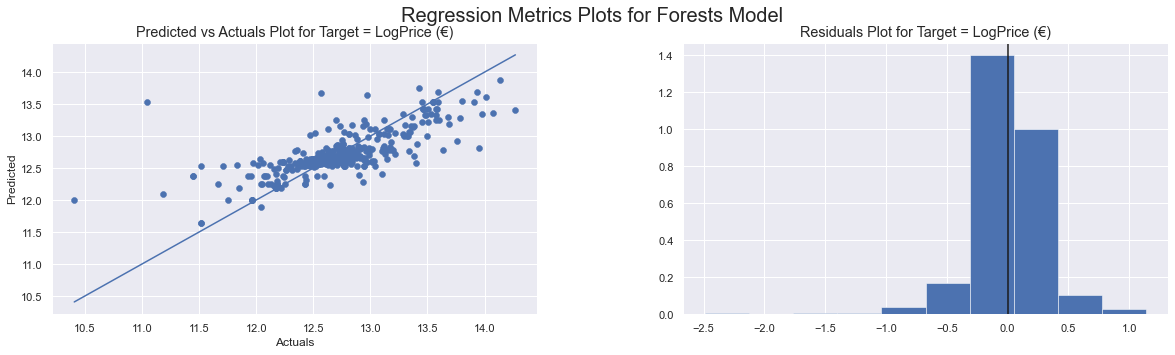

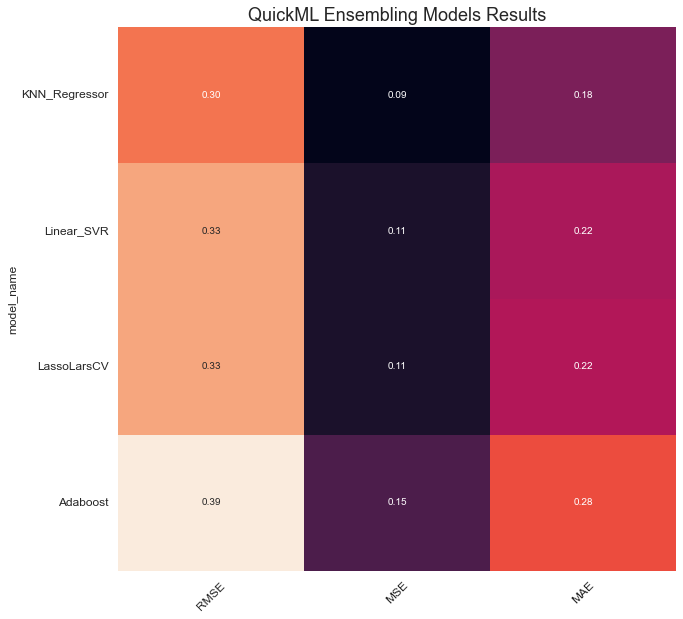

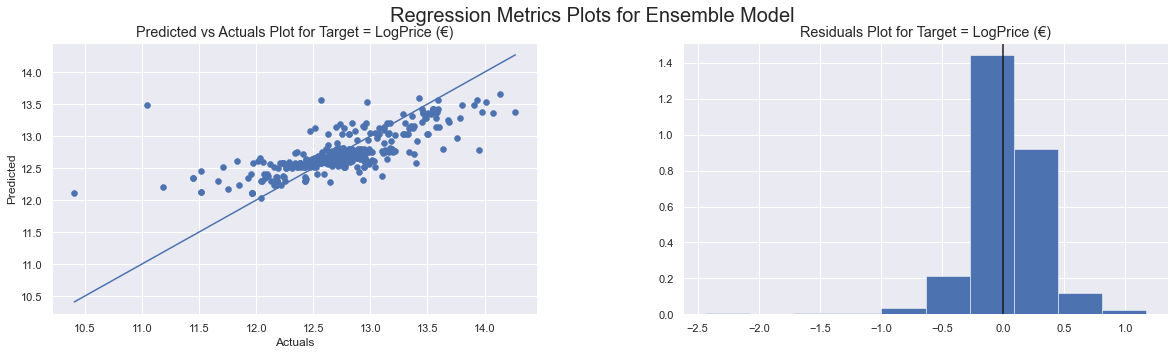

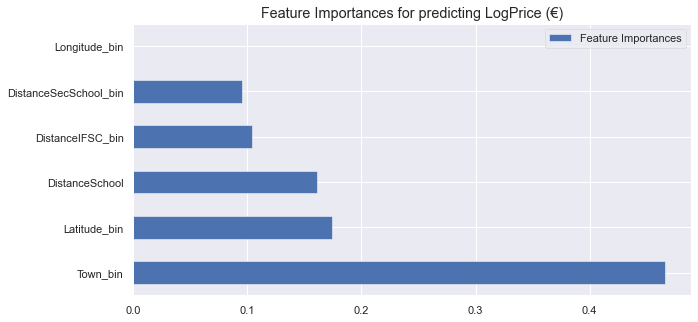

In [27]:
model, features, trainm, testm = Auto_ViML(
    train_21,
    target,
    test_21,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = False,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [28]:
## order changes results very strange
predicted_21_mod = model.predict(testm[['DistanceSchool', 'Town_bin', 'Longitude_bin', 'DistanceIFSC_bin', 'Latitude_bin', 'DistanceSecSchool_bin']])
acc = accuracy_threshold(y_test_21, predicted_21_mod, 0.1)
print('Accuracy for AutoViml 2021 is: ' + str(acc))

Accuracy for AutoViml 2021 is: 0.39593908629441626


In [29]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df11 = pd.DataFrame(columns = cnames)

df11 = df11.append({'Algorithm': 'AutoViml',
            'Year': 2021,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2226, 15)
    Training Set Memory Usage = 0.33 MB
Test Set Shape = (591, 15)
    Test Set Memory Usage = 0.09 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

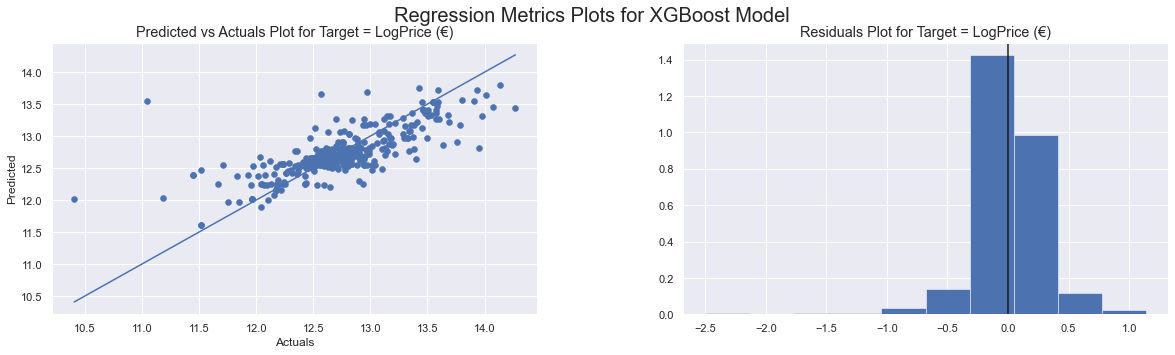

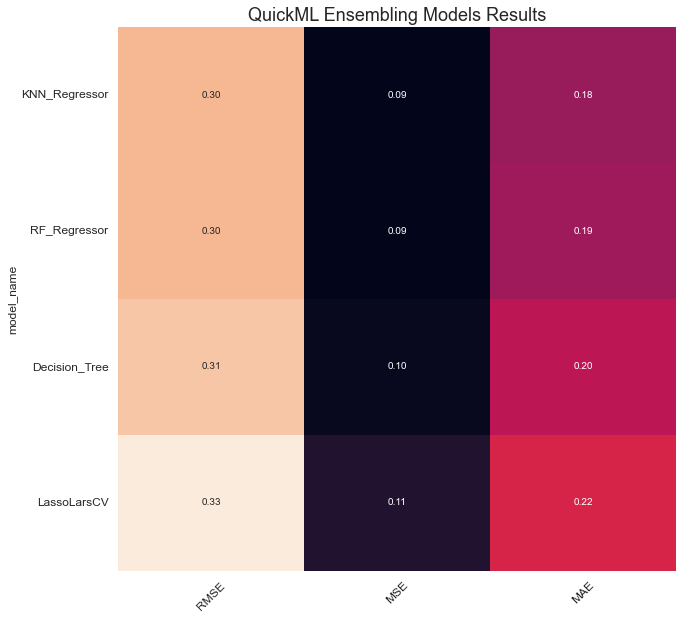

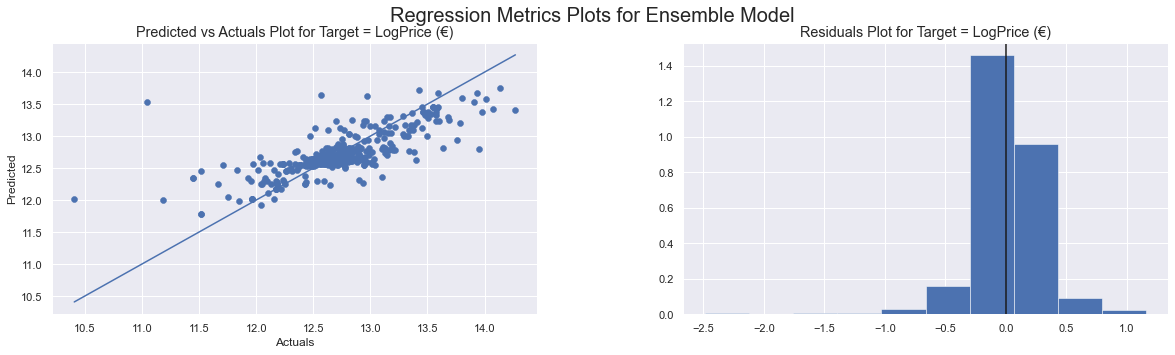

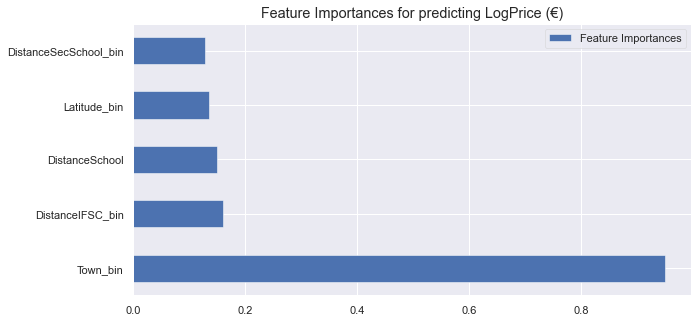

In [30]:
### boosting 
model, features, trainm, testm = Auto_ViML(
    train_21,
    target,
    test_21,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = True,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [31]:
testm.columns

Index(['DistanceSchool', 'Town_bin', 'Longitude_bin', 'Latitude_bin',
       'DistanceSecSchool_bin', 'DistanceIFSC_bin',
       'LogPrice (€)_LassoLarsCV_predictions',
       'LogPrice (€)_Decision_Tree_predictions',
       'LogPrice (€)_KNN_Regressor_predictions',
       'LogPrice (€)_RF_Regressor_predictions',
       'LogPrice (€)_XGBoost_predictions',
       'LogPrice (€)_Ensembled_predictions', 'LogPrice (€)_predictions'],
      dtype='object')

In [32]:
predicted_21_mod = model.predict(testm[['DistanceSchool', 'Town_bin', 'Longitude_bin', 'Latitude_bin',
       'DistanceSecSchool_bin', 'DistanceIFSC_bin']])
acc = accuracy_threshold(y_test_21, predicted_21_mod, 0.1)
print('Accuracy for AutoViml Boosting 2021 is: ' + str(acc))

Accuracy for AutoViml Boosting 2021 is: 0.38578680203045684


In [33]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df12 = pd.DataFrame(columns = cnames)

df12 = df12.append({'Algorithm': 'AutoVimlBoost',
            'Year': 2021,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2226, 15)
    Training Set Memory Usage = 0.33 MB
Test Set Shape = (591, 15)
    Test Set Memory Usage = 0.09 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.01701
0:	learn: 0.4110509	test: 0.4510743	best: 0.4510743 (0)	total: 165ms	remaining: 19m 17s


500:	learn: 0.2507762	test: 0.3036969	best: 0.3036969 (500)	total: 923ms	remaining: 12s
1000:	learn: 0.2294749	test: 0.2955678	best: 0.2955678 (1000)	total: 1.85s	remaining: 11.1s
1500:	learn: 0.2196070	test: 0.2942380	best: 0.2941376 (1306)	total: 2.71s	remaining: 9.91s
2000:	learn: 0.2137613	test: 0.2935332	best: 0.2935332 (2000)	total: 3.46s	remaining: 8.63s
2500:	learn: 0.2101248	test: 0.2933899	best: 0.2931284 (2303)	total: 4.21s	remaining: 7.57s
3000:	learn: 0.2072829	test: 0.2932248	best: 0.2931284 (2303)	total: 5.19s	remaining: 6.92s
3500:	learn: 0.2052670	test: 0.2930837	best: 0.2930837 (3500)	total: 5.97s	remaining: 5.96s
4000:	learn: 0.2038376	test: 0.2930704	best: 0.2930463 (3956)	total: 6.79s	remaining: 5.09s
4500:	learn: 0.2025515	test: 0.2929042	best: 0.2929042 (4500)	total: 7.54s	remaining: 4.19s
5000:	learn: 0.2014752	test: 0.2927805	best: 0.2927805 (5000)	total: 8.3s	remaining: 3.32s
5500:	learn: 0.2005799	test: 0.2927608	best: 0.2927490 (5483)	total: 9.08s	remaining:

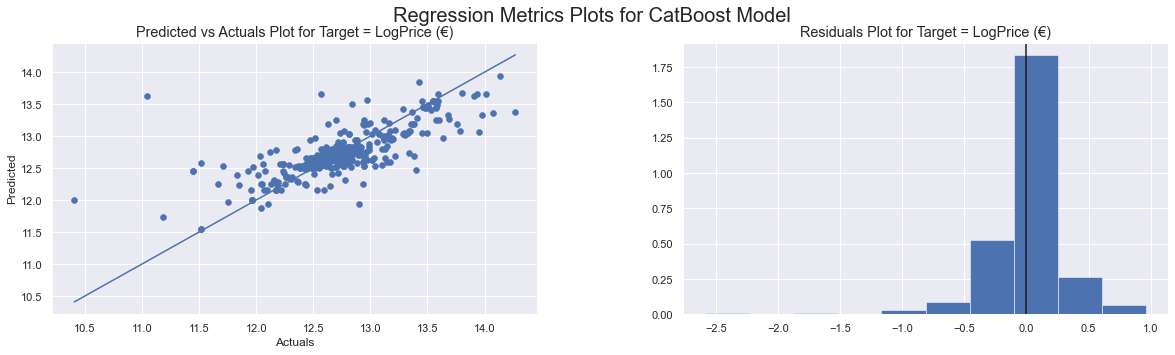

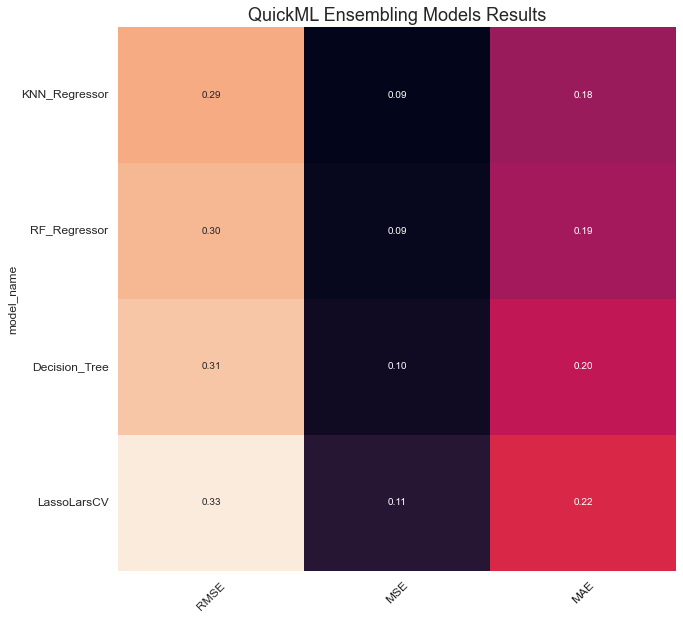

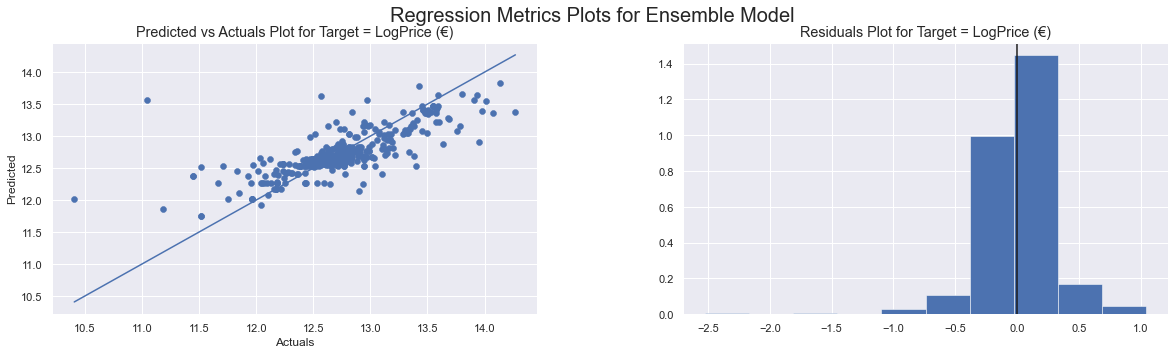

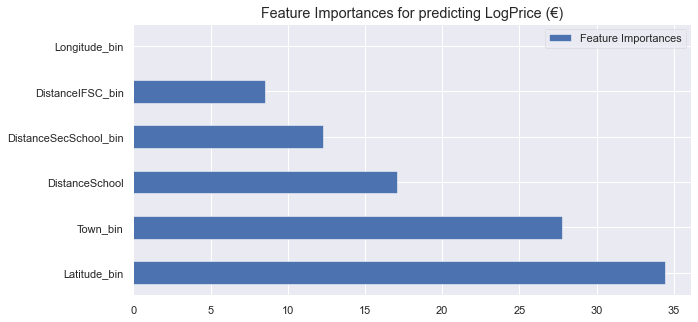

In [34]:
### CatBoost
model, features, trainm, testm = Auto_ViML(
    train_21,
    target,
    test_21,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = 'CatBoost',
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [35]:
testm.columns

Index(['DistanceSchool', 'Town_bin', 'Longitude_bin', 'Latitude_bin',
       'DistanceSecSchool_bin', 'DistanceIFSC_bin',
       'LogPrice (€)_LassoLarsCV_predictions',
       'LogPrice (€)_Decision_Tree_predictions',
       'LogPrice (€)_KNN_Regressor_predictions',
       'LogPrice (€)_RF_Regressor_predictions',
       'LogPrice (€)_CatBoost_predictions',
       'LogPrice (€)_Ensembled_predictions', 'LogPrice (€)_predictions'],
      dtype='object')

In [36]:
predicted_21_mod = model.predict(testm[['DistanceSchool', 'Town_bin', 'Longitude_bin', 'Latitude_bin',
       'DistanceSecSchool_bin', 'DistanceIFSC_bin']])
acc = accuracy_threshold(y_test_21, predicted_21_mod, 0.1)
print('Accuracy for AutoViml CatBoost 2021 is: ' + str(acc))

Accuracy for AutoViml CatBoost 2021 is: 0.40609137055837563


In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(np.exp(y_test_21), np.exp(predicted_21_mod))
print("MAPE for AutoViml CatBoost 2021 is: " + str(mape))

MAPE for AutoViml CatBoost 2021 is: 0.22224897959271323


In [38]:
median_se = np.square(np.subtract(np.exp(y_test_21), np.exp(predicted_21_mod))).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

51883.26385434784


In [39]:
rmse = mean_squared_error(np.exp(y_test_21), np.exp(predicted_21_mod), squared = False)
print('RMSE for AutoViml CatBoost 2021 is: ' + str(rmse))

RMSE for AutoViml CatBoost 2021 is: 180810.5599261001


In [40]:
#from sklearn.metrics import mean_absolute_percentage_error
#mape = mean_absolute_percentage_error(np.exp(y_test_21), np.exp(predicted_21_mod))
#print("MAPE for AutoViml CatBoost 2021 is: " + str(mape))

In [41]:
cnames = ['Algorithm', 'Year', 'Accuracy', 'MAE', 'RMSE', 'MAPE']
df13 = pd.DataFrame(columns = cnames)

df13 = df13.append({'Algorithm': 'AutoVimlCatBoost',
            'Year': 2021,
           'Accuracy': acc,
           'MAE': med,
           'RMSE': rmse,
           'MAPE': mape         
          }, ignore_index=True)

## 2020

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2069, 15)
    Training Set Memory Usage = 0.25 MB
Test Set Shape = (627, 15)
    Test Set Memory Usage = 0.08 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

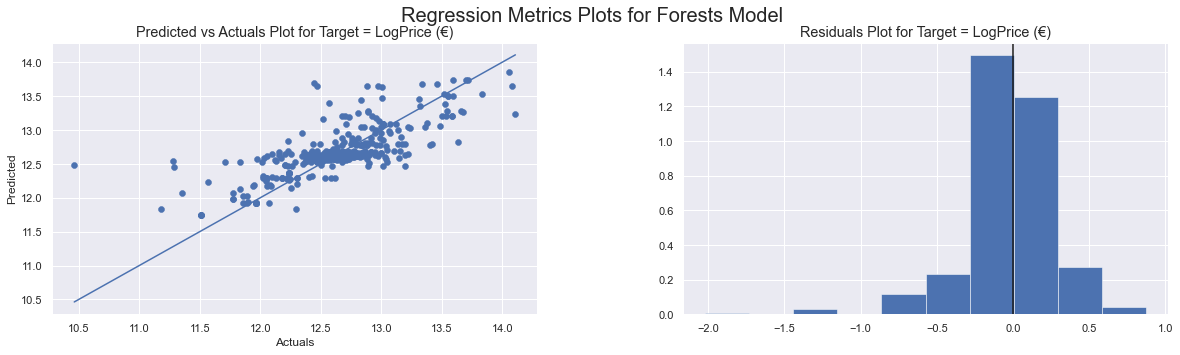

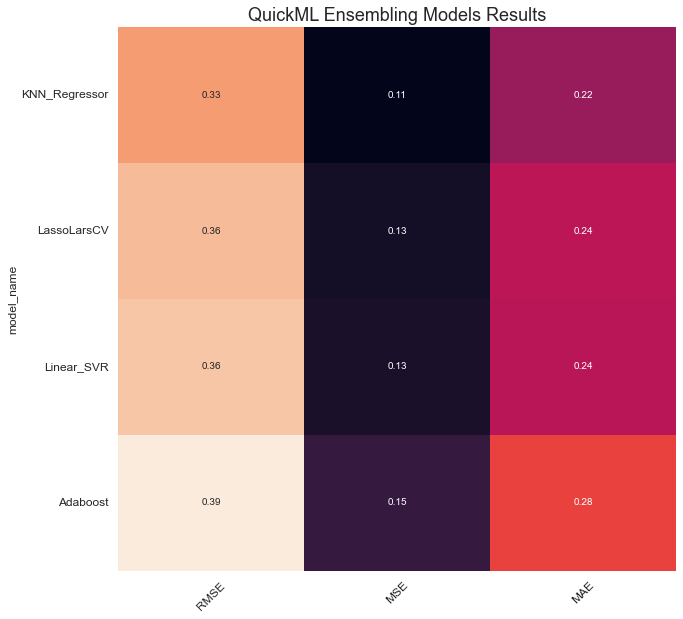

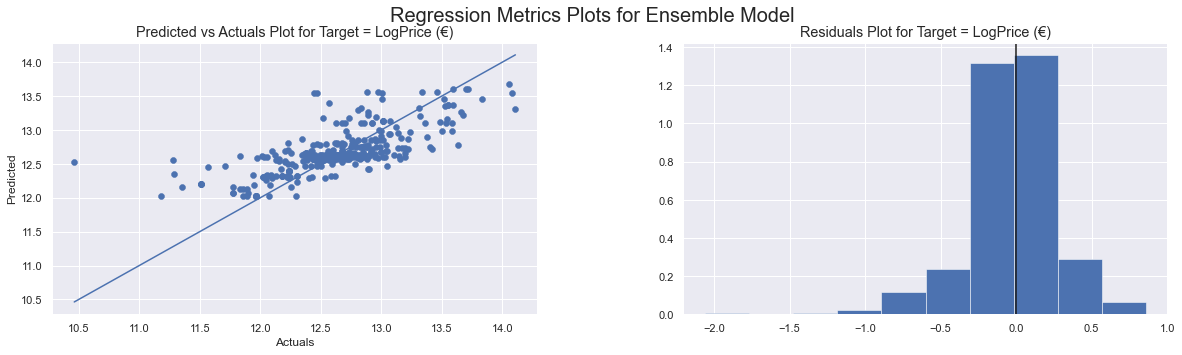

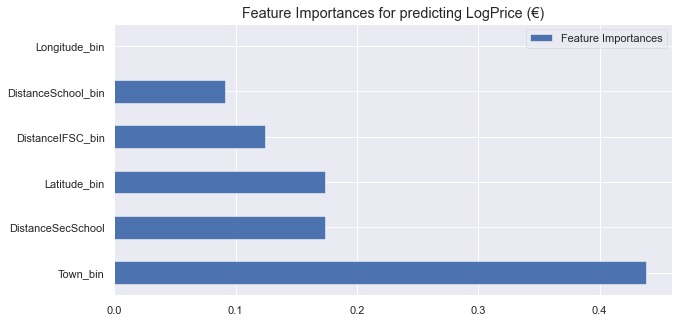

In [42]:
model, features, trainm, testm = Auto_ViML(
    train_20,
    target,
    test_20,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = False,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [43]:
testm.columns[:6]

Index(['DistanceSecSchool', 'Town_bin', 'Longitude_bin', 'DistanceSchool_bin',
       'Latitude_bin', 'DistanceIFSC_bin'],
      dtype='object')

In [44]:
## order changes results very strange
predicted_20_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_20, predicted_20_mod, 0.1)
print('Accuracy for AutoViml 2020 is: ' + str(acc))

Accuracy for AutoViml 2020 is: 0.4019138755980861


In [45]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df14 = pd.DataFrame(columns = cnames)

df14 = df14.append({'Algorithm': 'AutoViml',
            'Year': 2020,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2069, 15)
    Training Set Memory Usage = 0.32 MB
Test Set Shape = (627, 15)
    Test Set Memory Usage = 0.09 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

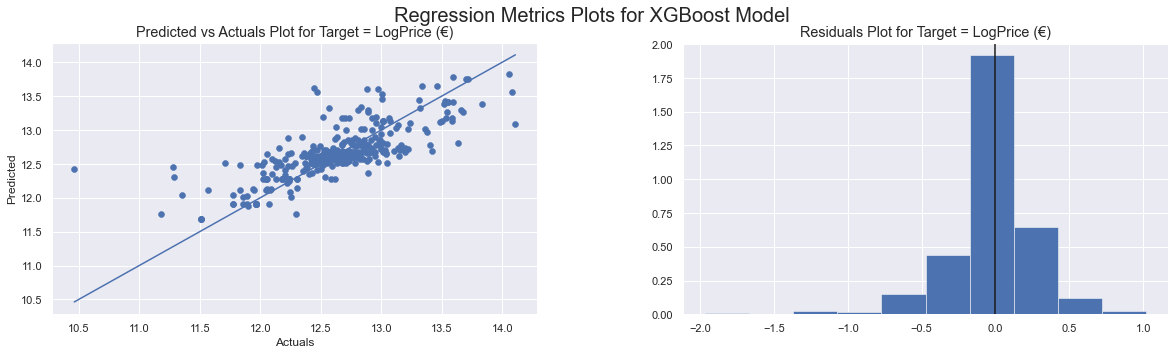

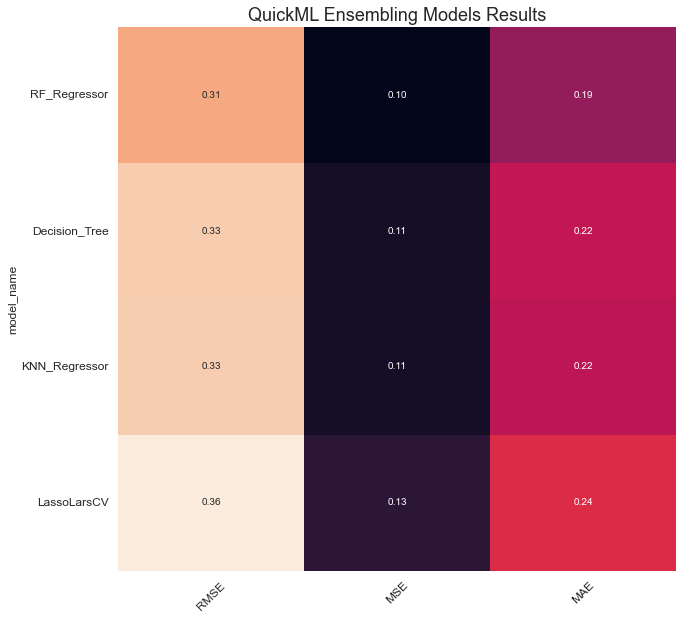

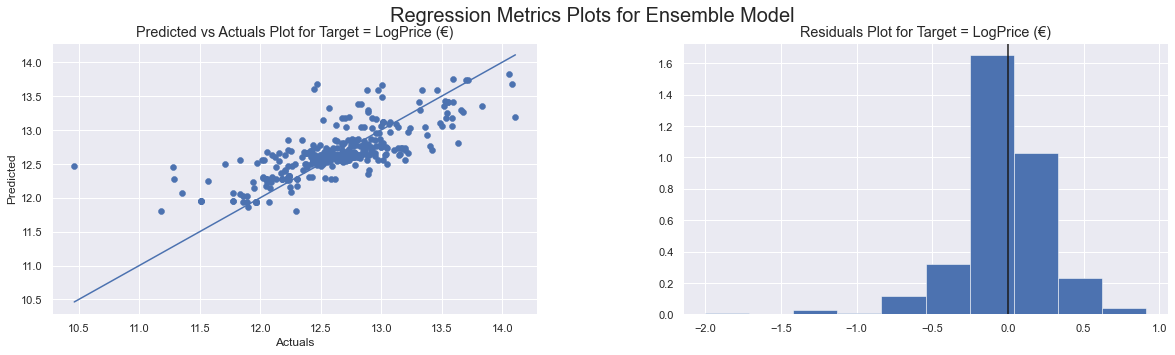

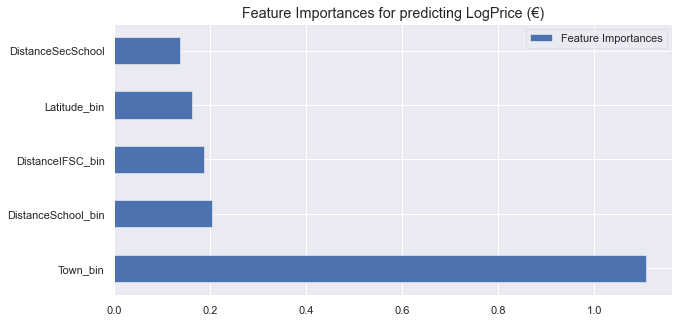

In [46]:
### boosting 
model, features, trainm, testm = Auto_ViML(
    train_20,
    target,
    test_20,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = True,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [47]:
## order changes results very strange
predicted_20_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_20, predicted_20_mod, 0.1)
print('Accuracy for AutoViml Boosting 2020 is: ' + str(acc))

Accuracy for AutoViml Boosting 2020 is: 0.41626794258373206


In [48]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df15 = pd.DataFrame(columns = cnames)

df15 = df15.append({'Algorithm': 'AutoVimlBoost',
            'Year': 2020,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2069, 15)
    Training Set Memory Usage = 0.32 MB
Test Set Shape = (627, 15)
    Test Set Memory Usage = 0.09 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016817
0:	learn: 0.4384709	test: 0.4461223	best: 0.4461223 (0)	total: 1.82ms	remaining: 12.7s


500:	learn: 0.2764735	test: 0.3074365	best: 0.3074365 (500)	total: 773ms	remaining: 10s
1000:	learn: 0.2561831	test: 0.2943968	best: 0.2943968 (1000)	total: 1.7s	remaining: 10.2s
1500:	learn: 0.2449551	test: 0.2888644	best: 0.2888627 (1497)	total: 2.83s	remaining: 10.4s
2000:	learn: 0.2386907	test: 0.2868221	best: 0.2868118 (1995)	total: 3.58s	remaining: 8.93s
2500:	learn: 0.2345420	test: 0.2855529	best: 0.2854972 (2483)	total: 4.31s	remaining: 7.76s
3000:	learn: 0.2315632	test: 0.2852137	best: 0.2850150 (2836)	total: 5.04s	remaining: 6.72s
3500:	learn: 0.2291857	test: 0.2851326	best: 0.2850150 (2836)	total: 5.76s	remaining: 5.76s
4000:	learn: 0.2274292	test: 0.2851377	best: 0.2850150 (2836)	total: 6.49s	remaining: 4.87s
4500:	learn: 0.2258125	test: 0.2850124	best: 0.2849754 (4357)	total: 7.5s	remaining: 4.17s
5000:	learn: 0.2247159	test: 0.2851205	best: 0.2849754 (4357)	total: 8.71s	remaining: 3.48s
5500:	learn: 0.2235455	test: 0.2851394	best: 0.2849754 (4357)	total: 9.65s	remaining: 

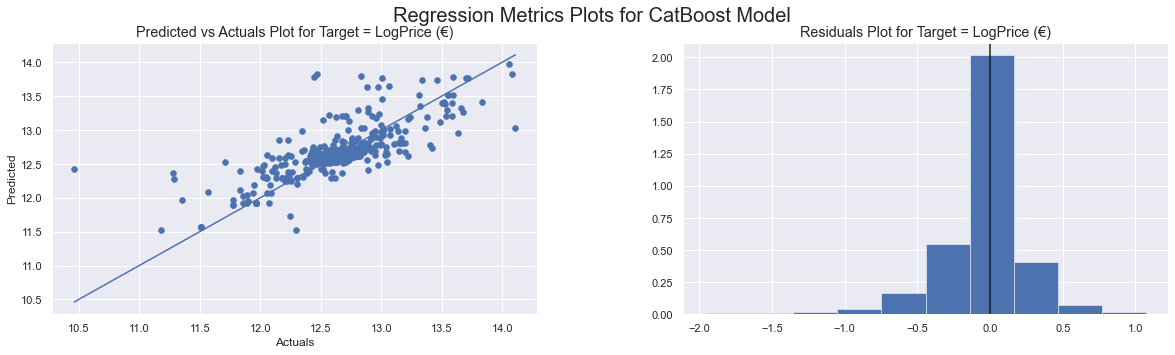

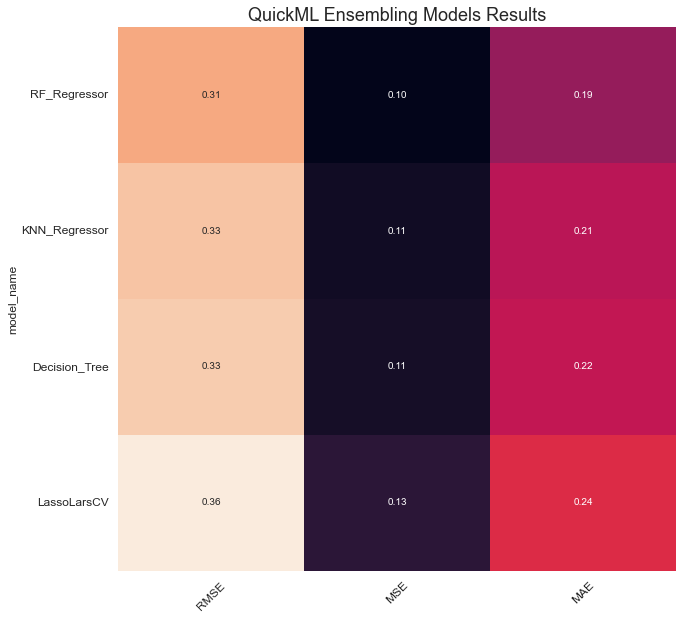

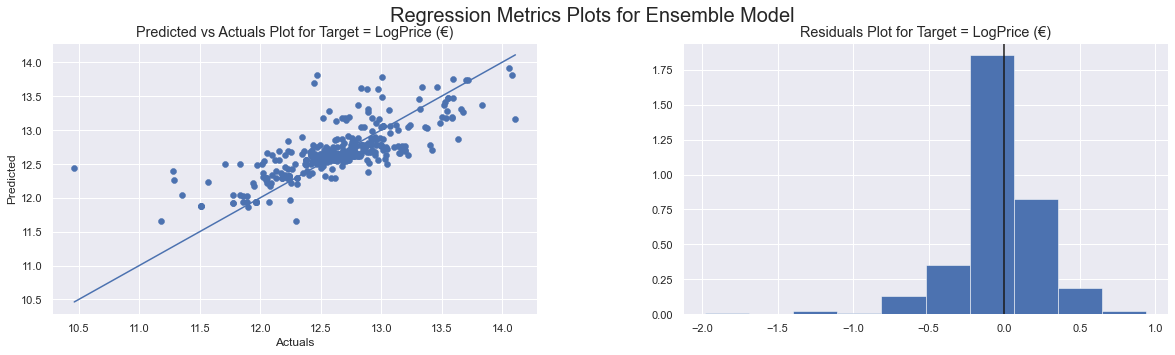

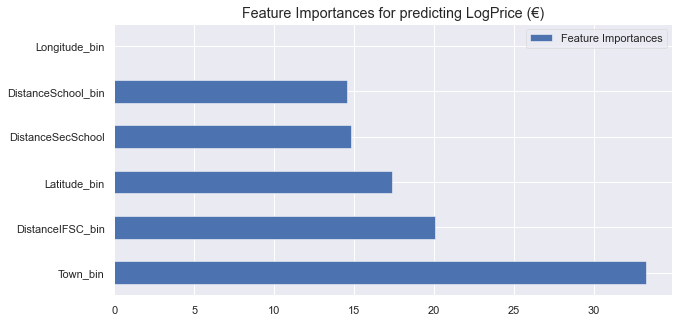

In [49]:
### CatBoost
model, features, trainm, testm = Auto_ViML(
    train_20,
    target,
    test_20,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = 'CatBoost',
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [50]:
predicted_20_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_20, predicted_20_mod, 0.1)
print('Accuracy for AutoViml CatBoosting 2020 is: ' + str(acc))

Accuracy for AutoViml CatBoosting 2020 is: 0.45454545454545453


In [51]:
mape = mean_absolute_percentage_error(np.exp(y_test_20), np.exp(predicted_20_mod))
print("MAPE for AutoViml CatBoost 2020 is: " + str(mape))

MAPE for AutoViml CatBoost 2020 is: 0.19812675545775554


In [52]:
rmse = mean_squared_error(np.exp(y_test_20), np.exp(predicted_20_mod), squared = False)
print('RMSE for AutoViml CatBoost 2020 is: ' + str(rmse))

RMSE for AutoViml CatBoost 2020 is: 128456.610712962


In [53]:
median_se = np.square(np.subtract(np.exp(y_test_20), np.exp(predicted_20_mod))).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

40177.22161322413


In [54]:
cnames = ['Algorithm', 'Year', 'Accuracy', 'MAE', 'RMSE', 'MAPE']
df16 = pd.DataFrame(columns = cnames)

df16 = df16.append({'Algorithm': 'AutoVimlCatBoost',
            'Year': 2020,
           'Accuracy': acc,
           'MAE': med,
           'RMSE': rmse,
           'MAPE': mape         
          }, ignore_index=True)

## 2019

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1709, 15)
    Training Set Memory Usage = 0.21 MB
Test Set Shape = (796, 15)
    Test Set Memory Usage = 0.10 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

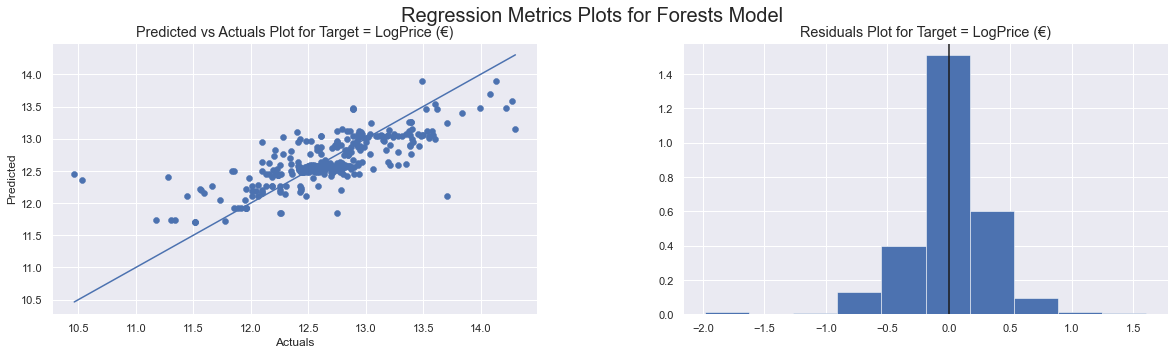

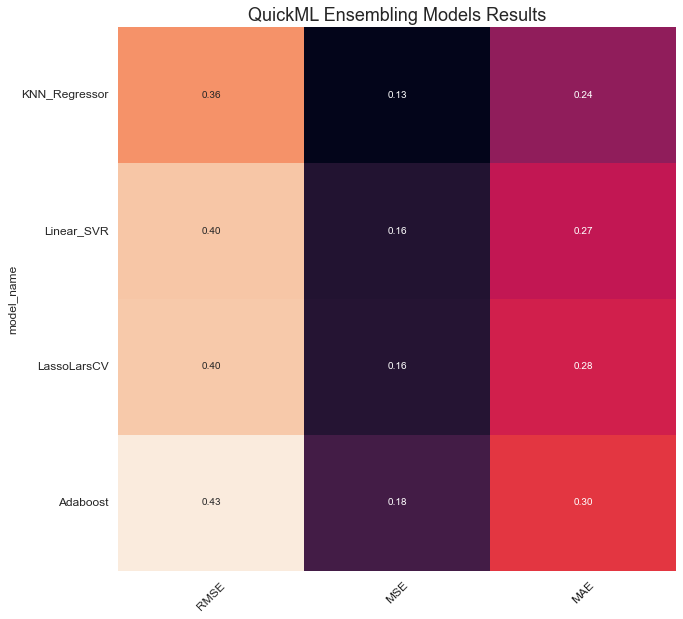

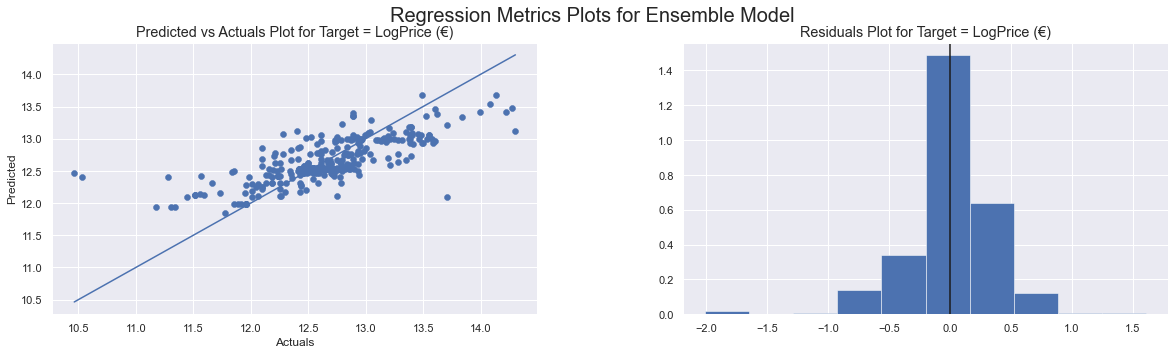

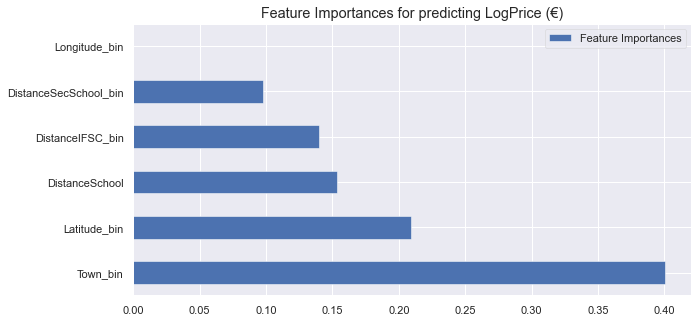

In [55]:
model, features, trainm, testm = Auto_ViML(
    train_19,
    target,
    test_19,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = False,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [56]:
## order changes results very strange
predicted_19_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_19, predicted_19_mod, 0.1)
print('Accuracy for AutoViml 2019 is: ' + str(acc))

Accuracy for AutoViml 2019 is: 0.2964824120603015


In [57]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df17 = pd.DataFrame(columns = cnames)

df17 = df17.append({'Algorithm': 'AutoViml',
            'Year': 2019,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1709, 15)
    Training Set Memory Usage = 0.27 MB
Test Set Shape = (796, 15)
    Test Set Memory Usage = 0.13 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

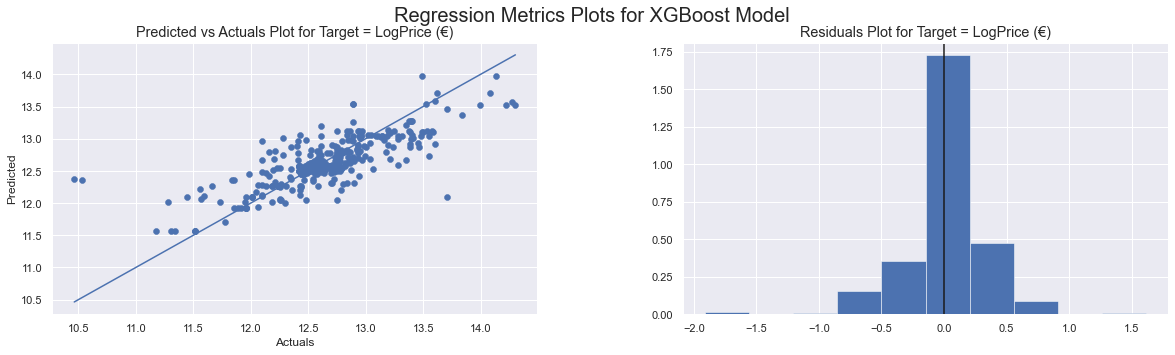

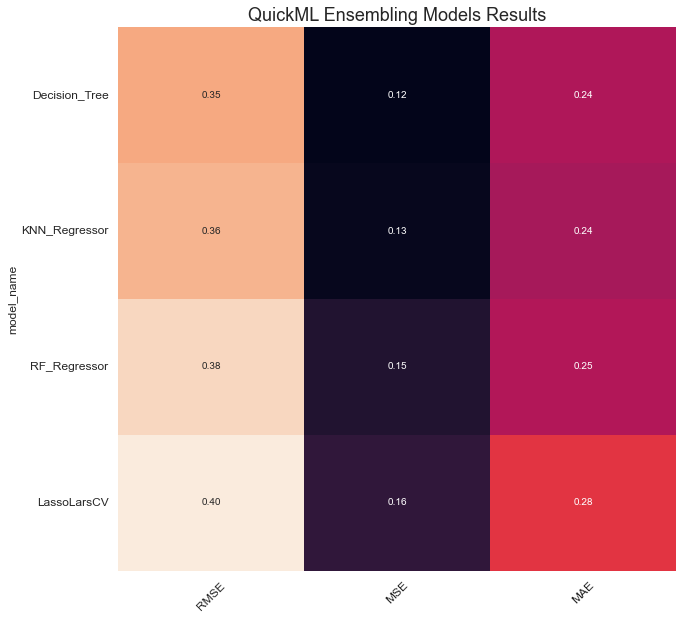

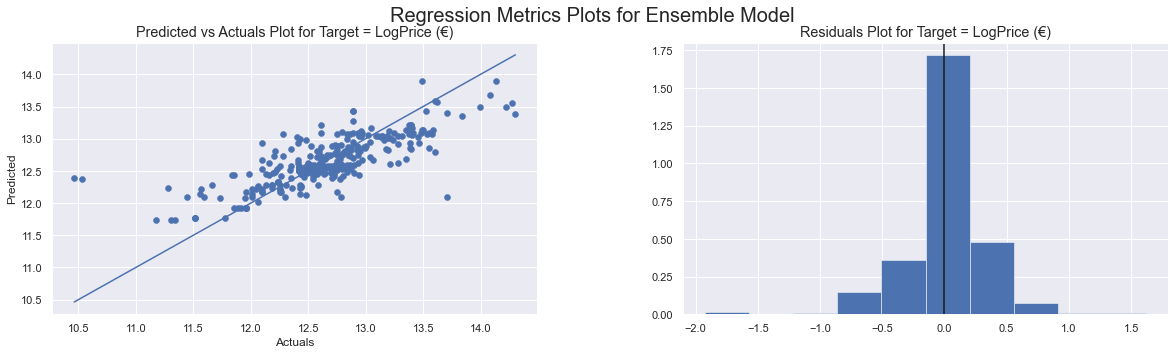

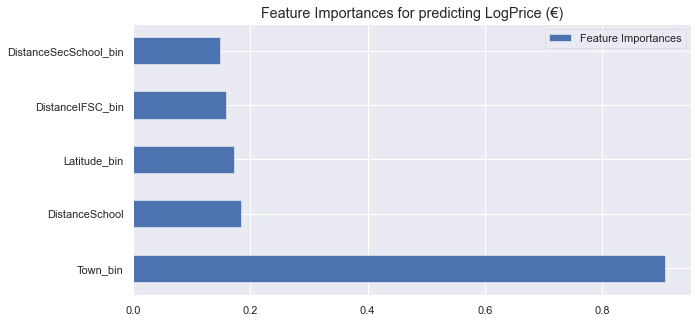

In [58]:
### boosting 
model, features, trainm, testm = Auto_ViML(
    train_19,
    target,
    test_19,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = True,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [59]:
predicted_19_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_19, predicted_19_mod, 0.1)
print('Accuracy for AutoViml Boosting 2019 is: ' + str(acc))

Accuracy for AutoViml Boosting 2019 is: 0.3065326633165829


In [60]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df18 = pd.DataFrame(columns = cnames)

df18 = df18.append({'Algorithm': 'AutoVimlBoost',
            'Year': 2019,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1709, 15)
    Training Set Memory Usage = 0.27 MB
Test Set Shape = (796, 15)
    Test Set Memory Usage = 0.13 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016319
0:	learn: 0.4994114	test: 0.5215459	best: 0.5215459 (0)	total: 1.63ms	remaining: 11.4s


500:	learn: 0.3017096	test: 0.3671079	best: 0.3670424 (499)	total: 723ms	remaining: 9.38s
1000:	learn: 0.2726197	test: 0.3452397	best: 0.3452397 (1000)	total: 1.82s	remaining: 10.9s
1500:	learn: 0.2586751	test: 0.3352349	best: 0.3352349 (1500)	total: 2.72s	remaining: 9.96s
2000:	learn: 0.2507435	test: 0.3307083	best: 0.3307083 (2000)	total: 3.44s	remaining: 8.59s
2500:	learn: 0.2454493	test: 0.3278461	best: 0.3278330 (2497)	total: 4.15s	remaining: 7.47s
3000:	learn: 0.2416125	test: 0.3262445	best: 0.3261660 (2986)	total: 4.86s	remaining: 6.47s
3500:	learn: 0.2387761	test: 0.3253506	best: 0.3253376 (3495)	total: 5.64s	remaining: 5.63s
4000:	learn: 0.2366067	test: 0.3245154	best: 0.3244999 (3997)	total: 6.42s	remaining: 4.82s
4500:	learn: 0.2348388	test: 0.3240543	best: 0.3240424 (4492)	total: 7.18s	remaining: 3.98s
5000:	learn: 0.2334207	test: 0.3234476	best: 0.3234200 (4978)	total: 7.89s	remaining: 3.15s
5500:	learn: 0.2323597	test: 0.3235337	best: 0.3234154 (5305)	total: 8.59s	remaini

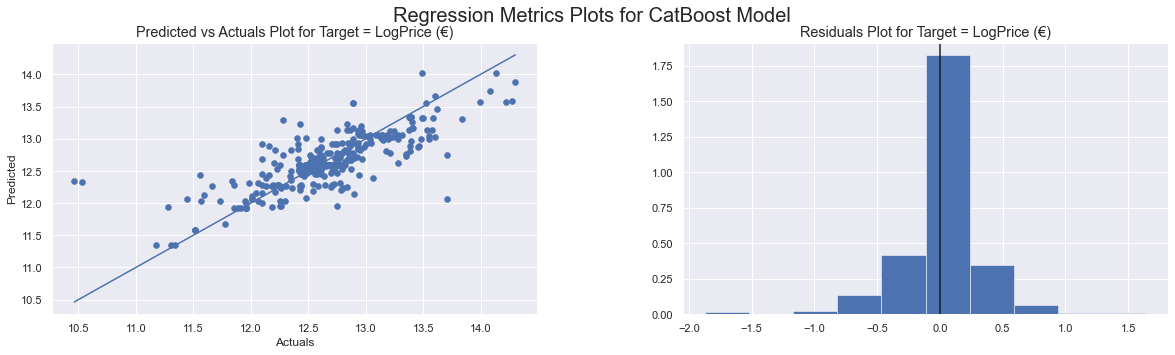

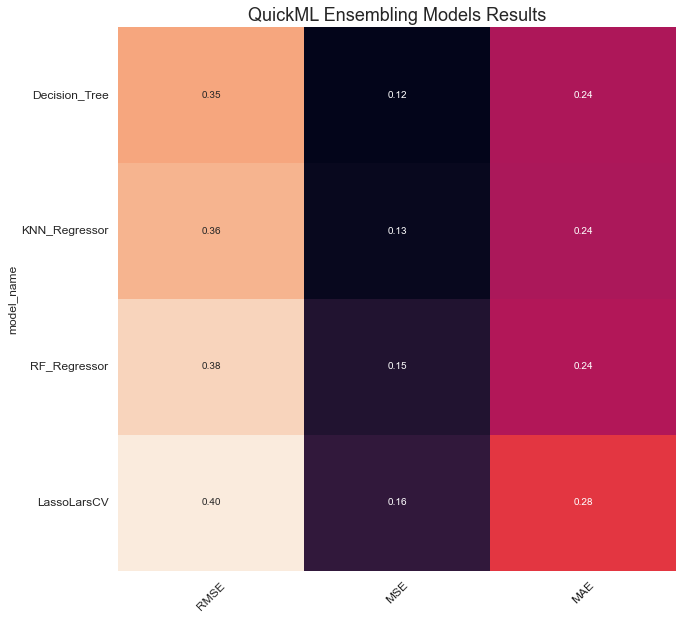

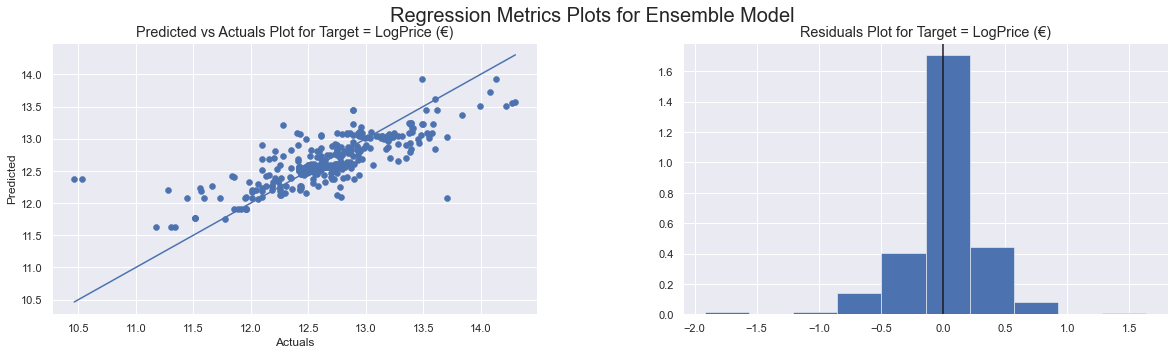

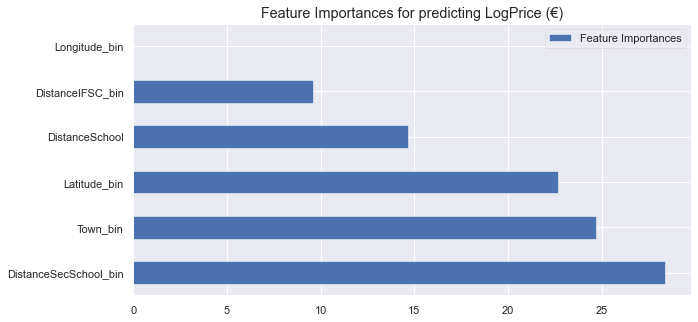

In [61]:
### CatBoost
model, features, trainm, testm = Auto_ViML(
    train_19,
    target,
    test_19,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = 'CatBoost',
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [62]:
predicted_19_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_19, predicted_19_mod, 0.1)
print('Accuracy for AutoViml CatBoosting 2019 is: ' + str(acc))

Accuracy for AutoViml CatBoosting 2019 is: 0.33668341708542715


In [63]:
mape = mean_absolute_percentage_error(np.exp(y_test_19), np.exp(predicted_19_mod))
print("MAPE for AutoViml CatBoost 2019 is: " + str(mape))

MAPE for AutoViml CatBoost 2019 is: 0.20936938786471018


In [64]:
rmse = mean_squared_error(np.exp(y_test_19), np.exp(predicted_19_mod), squared = False)
print('RMSE for AutoViml CatBoost 2019 is: ' + str(rmse))

RMSE for AutoViml CatBoost 2019 is: 118736.07962338337


In [65]:
median_se = np.square(np.subtract(np.exp(y_test_19), np.exp(predicted_19_mod))).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

46186.65572449977


In [66]:
cnames = ['Algorithm', 'Year', 'Accuracy', 'MAE', 'RMSE', 'MAPE']
df19 = pd.DataFrame(columns = cnames)

df19 = df19.append({'Algorithm': 'AutoVimlCatBoost',
            'Year': 2019,
           'Accuracy': acc,
           'MAE': med,
           'RMSE': rmse,
           'MAPE': mape         
          }, ignore_index=True)

## 2018

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1666, 15)
    Training Set Memory Usage = 0.20 MB
Test Set Shape = (803, 15)
    Test Set Memory Usage = 0.10 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

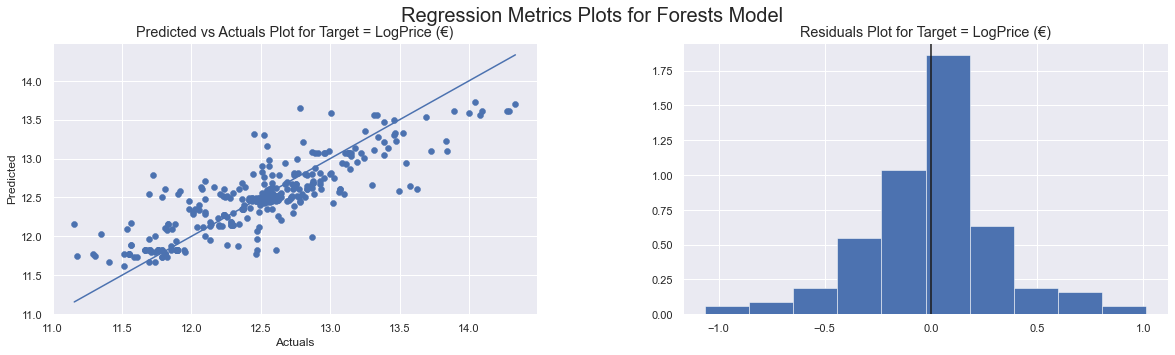

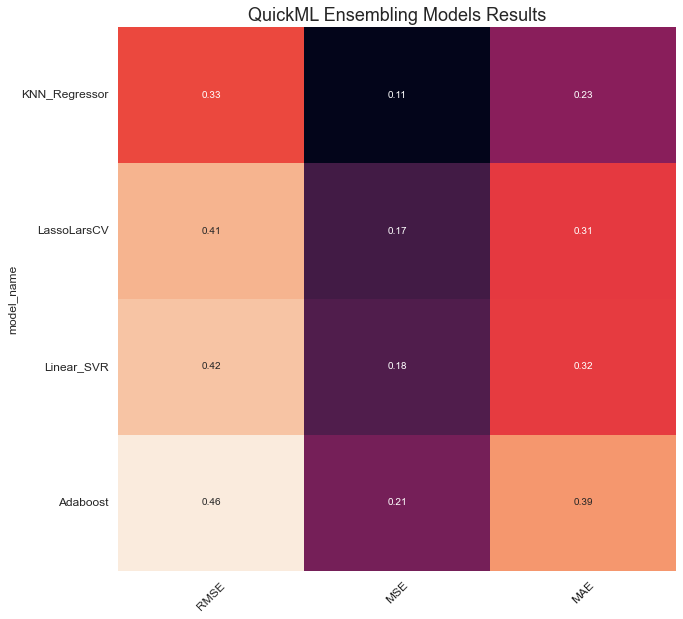

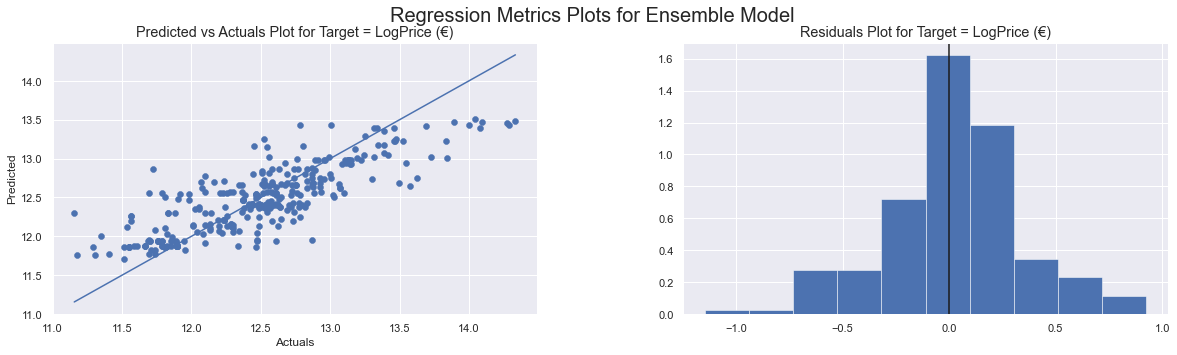

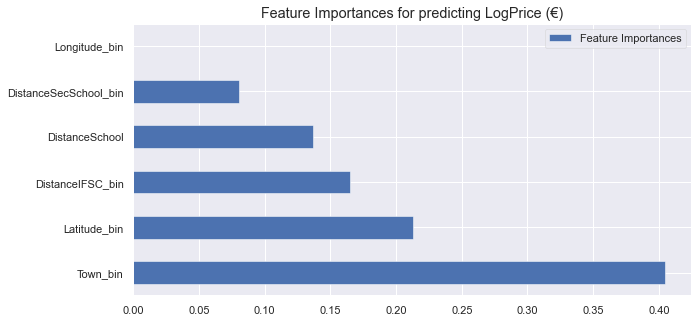

In [67]:
model, features, trainm, testm = Auto_ViML(
    train_18,
    target,
    test_18,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = False,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [68]:
predicted_18_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_18, predicted_18_mod, 0.1)
print('Accuracy for AutoViml 2018 is: ' + str(acc))

Accuracy for AutoViml 2018 is: 0.2727272727272727


In [69]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df20 = pd.DataFrame(columns = cnames)

df20 = df20.append({'Algorithm': 'AutoViml',
            'Year': 2018,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1666, 15)
    Training Set Memory Usage = 0.27 MB
Test Set Shape = (803, 15)
    Test Set Memory Usage = 0.13 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

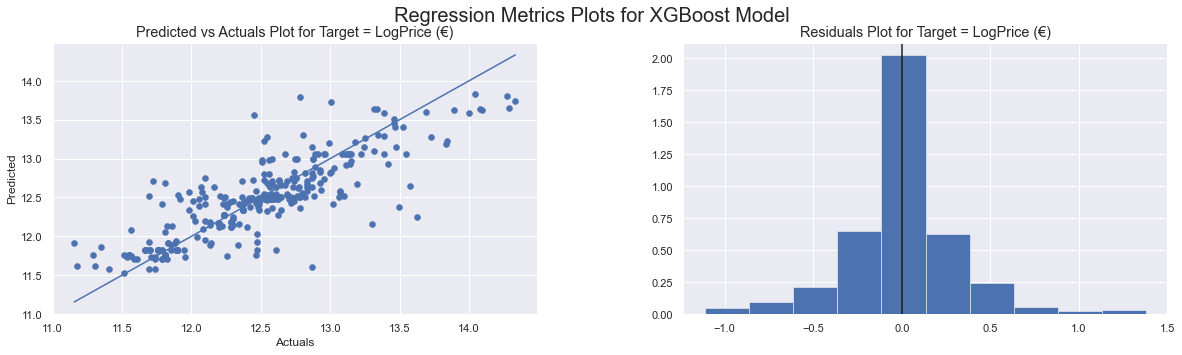

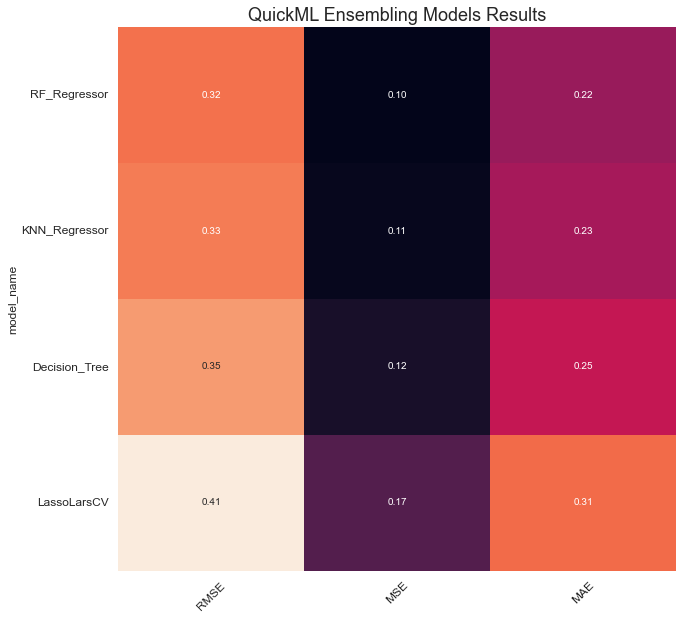

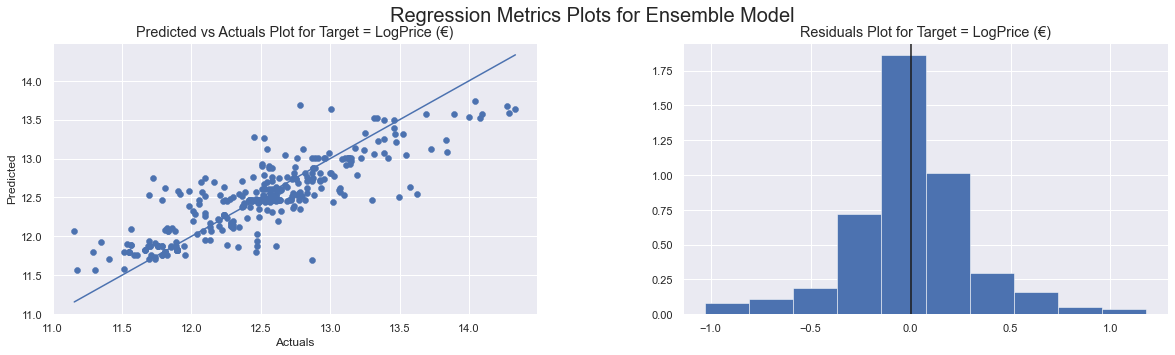

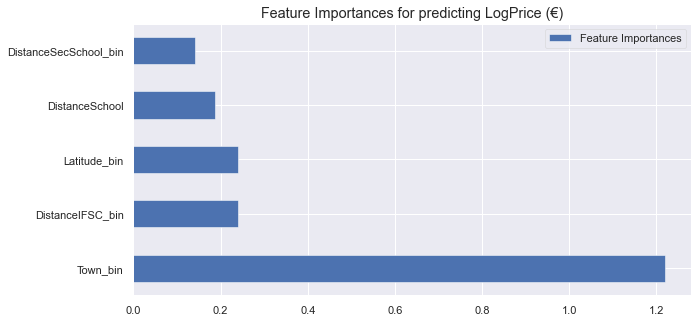

In [70]:
### boosting 
model, features, trainm, testm = Auto_ViML(
    train_18,
    target,
    test_18,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = True,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [71]:
predicted_18_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_18, predicted_18_mod, 0.1)
print('Accuracy for AutoViml Boosting 2018 is: ' + str(acc))

Accuracy for AutoViml Boosting 2018 is: 0.2602739726027397


In [72]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df21 = pd.DataFrame(columns = cnames)

df21 = df21.append({'Algorithm': 'AutoVimlBoost',
            'Year': 2018,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1666, 15)
    Training Set Memory Usage = 0.27 MB
Test Set Shape = (803, 15)
    Test Set Memory Usage = 0.13 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016253
0:	learn: 0.5837089	test: 0.5798031	best: 0.5798031 (0)	total: 2.63ms	remaining: 18.4s


500:	learn: 0.3169155	test: 0.3256011	best: 0.3256011 (500)	total: 1.09s	remaining: 14.1s
1000:	learn: 0.2825105	test: 0.3105475	best: 0.3105391 (996)	total: 2s	remaining: 12s
1500:	learn: 0.2669986	test: 0.3068401	best: 0.3068168 (1497)	total: 3.34s	remaining: 12.2s
2000:	learn: 0.2575172	test: 0.3060144	best: 0.3058837 (1930)	total: 4.36s	remaining: 10.9s
2500:	learn: 0.2511045	test: 0.3062849	best: 0.3058345 (2039)	total: 5.35s	remaining: 9.62s
3000:	learn: 0.2464053	test: 0.3068697	best: 0.3058345 (2039)	total: 6.34s	remaining: 8.45s
3500:	learn: 0.2432979	test: 0.3074354	best: 0.3058345 (2039)	total: 7.26s	remaining: 7.26s
4000:	learn: 0.2408444	test: 0.3080824	best: 0.3058345 (2039)	total: 8.08s	remaining: 6.06s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.3058344704
bestIteration = 2039

Shrink model to first 2040 iterations.
    Actual training time (in seconds): 9
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Valid

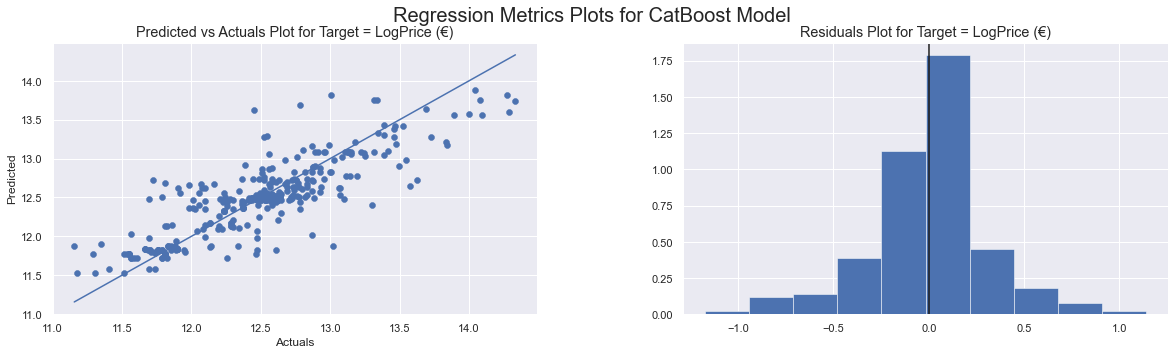

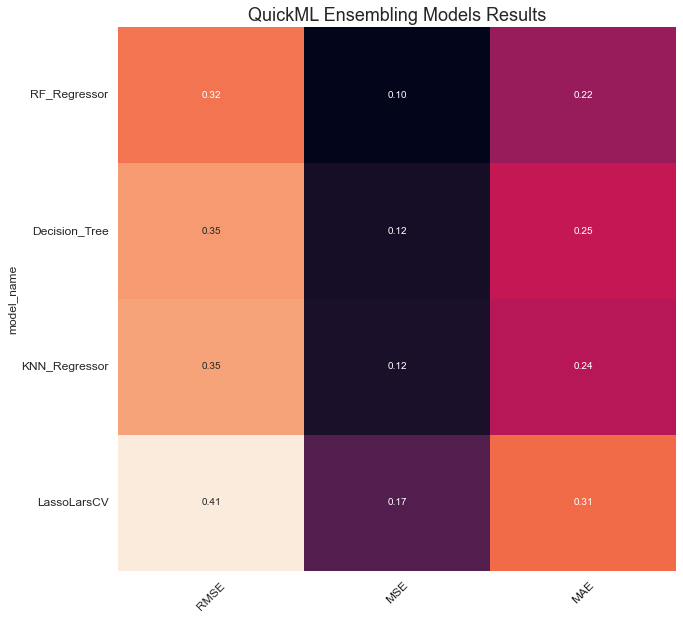

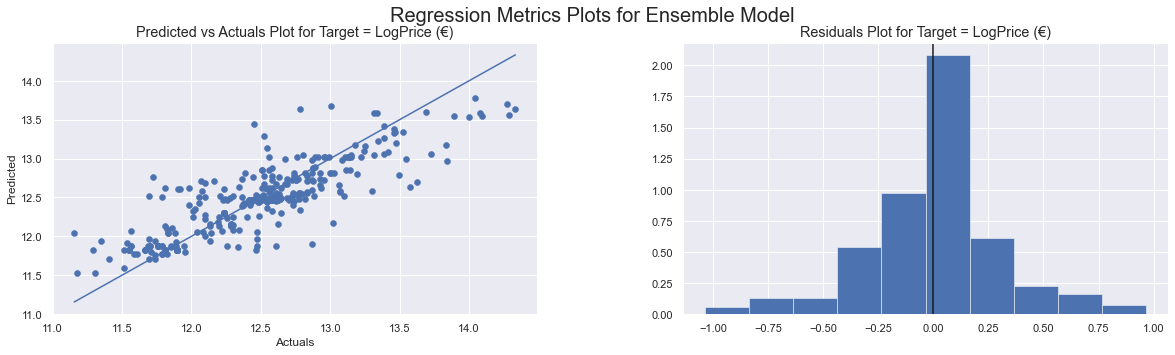

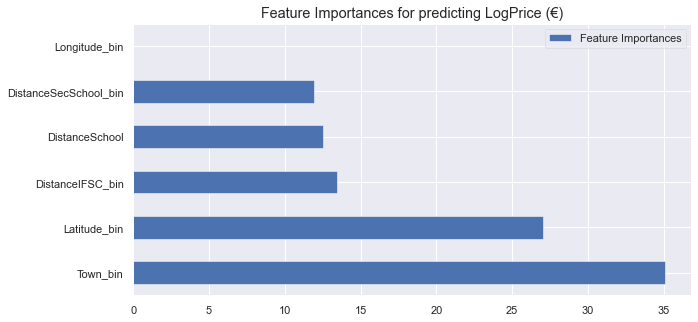

In [73]:
### CatBoost
model, features, trainm, testm = Auto_ViML(
    train_18,
    target,
    test_18,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = 'CatBoost',
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [74]:
predicted_18_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_18, predicted_18_mod, 0.1)
print('Accuracy for AutoViml CatBoosting 2018 is: ' + str(acc))

Accuracy for AutoViml CatBoosting 2018 is: 0.28268991282689915


In [75]:
mape = mean_absolute_percentage_error(np.exp(y_test_18), np.exp(predicted_18_mod))
print("MAPE for AutoViml CatBoost 2018 is: " + str(mape))

MAPE for AutoViml CatBoost 2018 is: 0.28984200093296264


In [76]:
median_se = np.square(np.subtract(np.exp(y_test_18), np.exp(predicted_18_mod))).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

60218.32417828377


In [77]:
rmse = mean_squared_error(np.exp(y_test_18), np.exp(predicted_18_mod), squared = False)
print('RMSE for AutoViml CatBoost 2018 is: ' + str(rmse))

RMSE for AutoViml CatBoost 2018 is: 151558.8179401645


In [78]:
cnames = ['Algorithm', 'Year', 'Accuracy', 'MAE', 'RMSE', 'MAPE']
df22 = pd.DataFrame(columns = cnames)

df22 = df22.append({'Algorithm': 'AutoVimlCatBoost',
            'Year': 2018,
           'Accuracy': acc,
           'MAE': med,
           'RMSE': rmse,
           'MAPE': mape         
          }, ignore_index=True)

## 2017

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2099, 15)
    Training Set Memory Usage = 0.26 MB
Test Set Shape = (470, 15)
    Test Set Memory Usage = 0.06 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

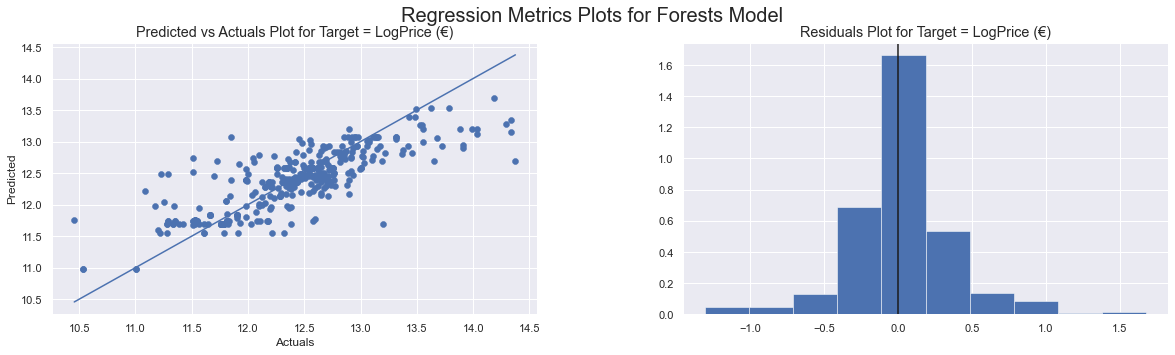

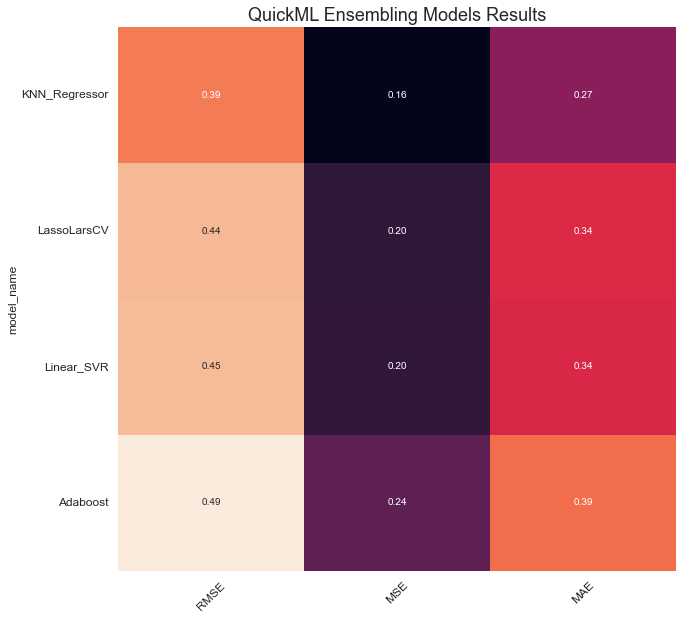

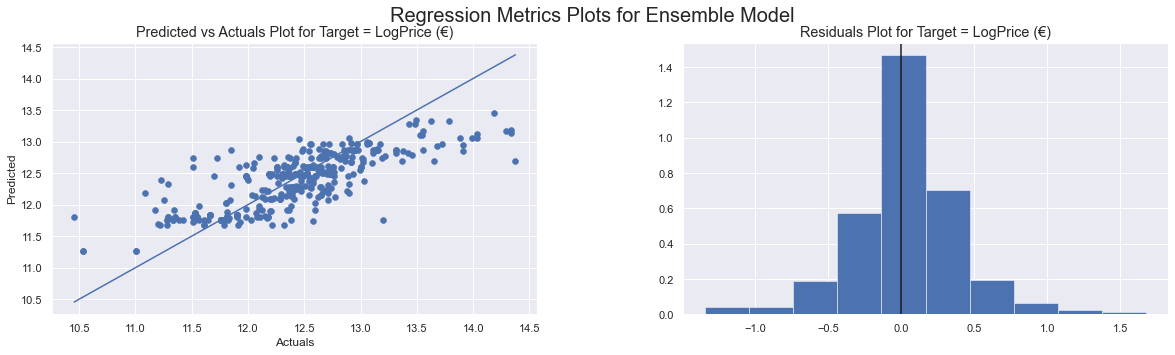

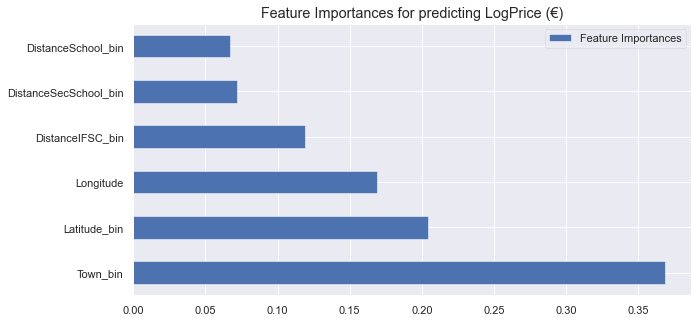

In [79]:
model, features, trainm, testm = Auto_ViML(
    train_17,
    target,
    test_17,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = False,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [80]:
predicted_17_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_17, predicted_17_mod, 0.1)
print('Accuracy for AutoViml 2017 is: ' + str(acc))

Accuracy for AutoViml 2017 is: 0.2404255319148936


In [81]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df23 = pd.DataFrame(columns = cnames)

df23 = df23.append({'Algorithm': 'AutoViml',
            'Year': 2017,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2099, 15)
    Training Set Memory Usage = 0.32 MB
Test Set Shape = (470, 15)
    Test Set Memory Usage = 0.07 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

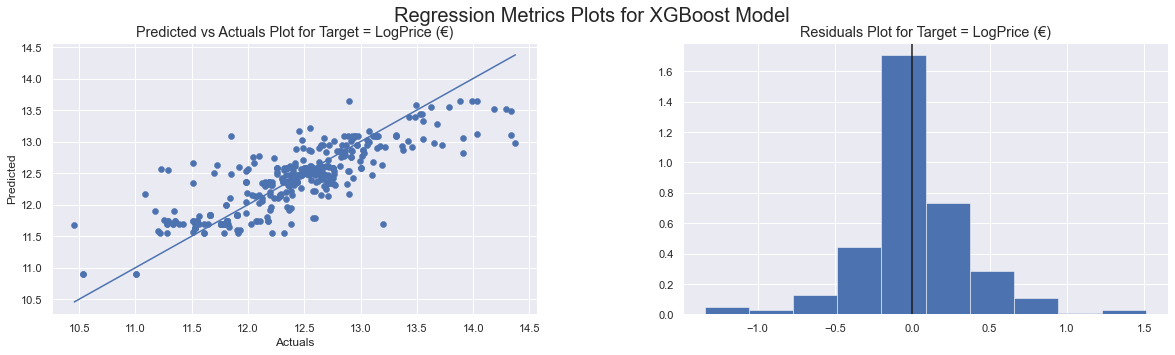

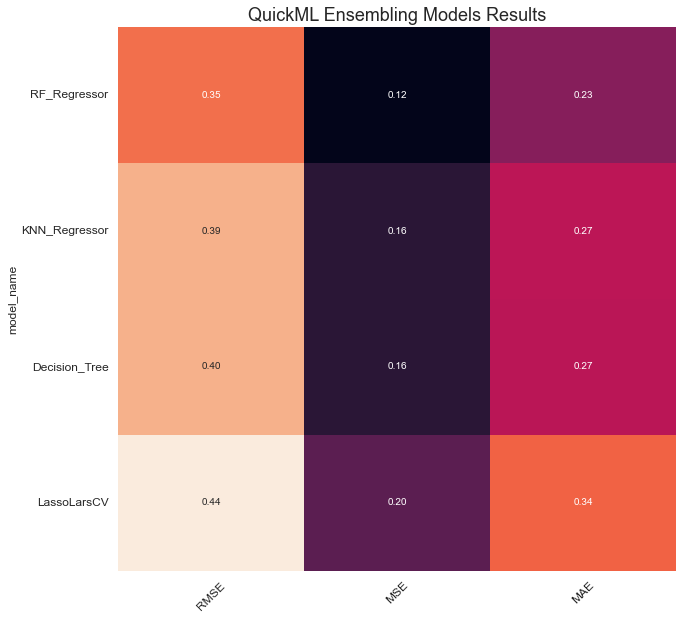

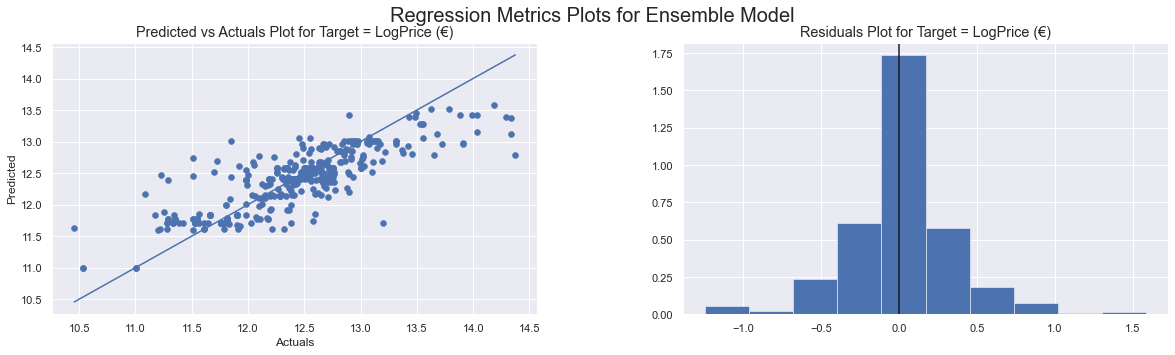

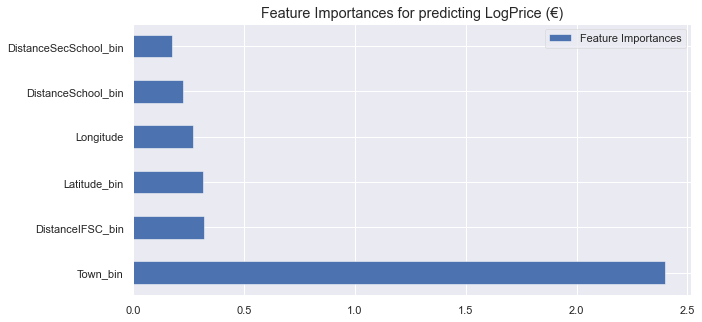

In [82]:
### boosting 
model, features, trainm, testm = Auto_ViML(
    train_17,
    target,
    test_17,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = True,
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [83]:
predicted_17_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_17, predicted_17_mod, 0.1)
print('Accuracy for AutoViml Boosting 2017 is: ' + str(acc))

Accuracy for AutoViml Boosting 2017 is: 0.2936170212765957


In [84]:
cnames = ['Algorithm', 'Year', 'Accuracy']
df24 = pd.DataFrame(columns = cnames)

df24 = df24.append({'Algorithm': 'AutoVimlBoost',
            'Year': 2017,
           'Accuracy': acc,       
          }, ignore_index=True)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2099, 15)
    Training Set Memory Usage = 0.32 MB
Test Set Shape = (470, 15)
    Test Set Memory Usage = 0.07 MB
Single_Label Target: ['LogPrice (€)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016855
0:	learn: 0.5804252	test: 0.6114818	best: 0.6114818 (0)	total: 1.72ms	remaining: 12.1s


500:	learn: 0.3101224	test: 0.3880986	best: 0.3880986 (500)	total: 906ms	remaining: 11.8s
1000:	learn: 0.2702285	test: 0.3636239	best: 0.3635239 (995)	total: 2.18s	remaining: 13s
1500:	learn: 0.2520347	test: 0.3551754	best: 0.3551754 (1500)	total: 3.01s	remaining: 11s
2000:	learn: 0.2415442	test: 0.3506017	best: 0.3505753 (1995)	total: 3.77s	remaining: 9.43s
2500:	learn: 0.2347081	test: 0.3485151	best: 0.3485096 (2497)	total: 4.59s	remaining: 8.25s
3000:	learn: 0.2299874	test: 0.3470981	best: 0.3470789 (2995)	total: 5.44s	remaining: 7.24s
3500:	learn: 0.2264766	test: 0.3462307	best: 0.3462190 (3499)	total: 6.36s	remaining: 6.35s
4000:	learn: 0.2238798	test: 0.3457971	best: 0.3457941 (3998)	total: 7.15s	remaining: 5.36s
4500:	learn: 0.2219117	test: 0.3457006	best: 0.3456728 (4329)	total: 7.95s	remaining: 4.42s
5000:	learn: 0.2203111	test: 0.3453349	best: 0.3453349 (5000)	total: 8.71s	remaining: 3.48s
5500:	learn: 0.2189078	test: 0.3450730	best: 0.3450730 (5500)	total: 9.46s	remaining: 2

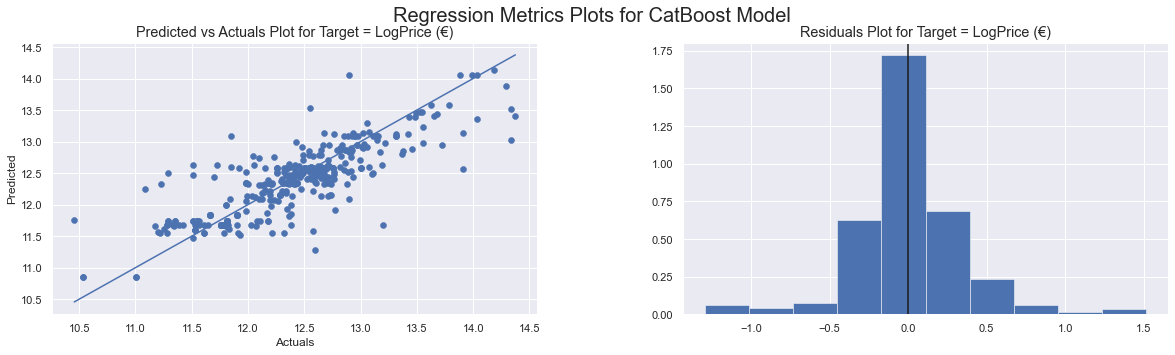

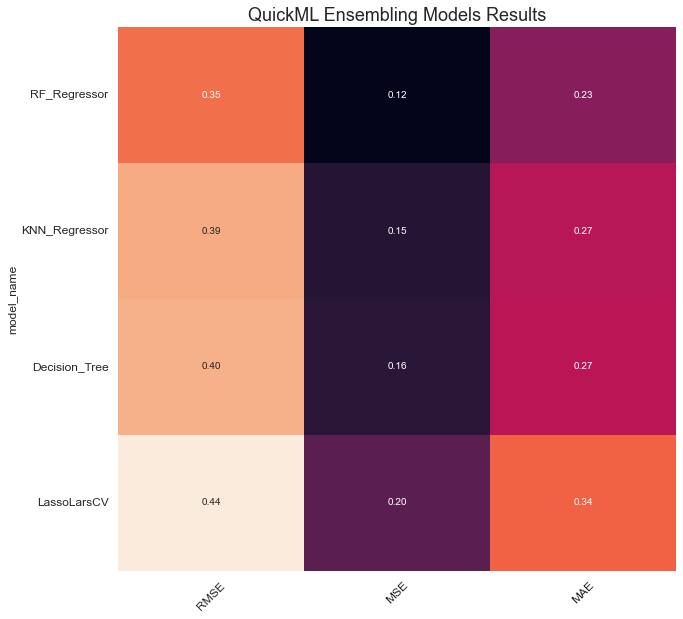

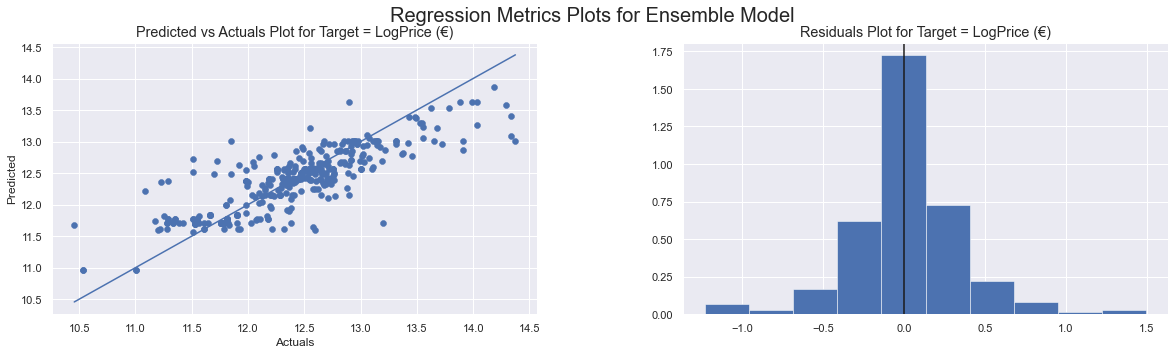

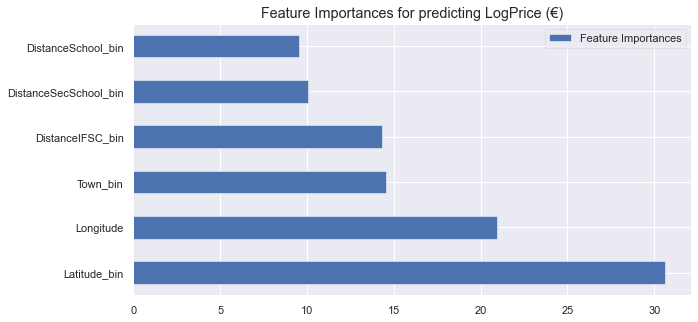

In [85]:
### CatBoost
model, features, trainm, testm = Auto_ViML(
    train_17,
    target,
    test_17,
    hyper_param = "GS",
    feature_reduction = True,
    KMeans_Featurizer = False,
    Boosting_Flag = 'CatBoost',
    Binning_Flag = True,
    Add_Poly = False,
    Stacking_Flag = False,
    Imbalanced_Flag = False,
    verbose = 0,
)

In [86]:
predicted_17_mod = model.predict(testm[testm.columns[:6]])
acc = accuracy_threshold(y_test_17, predicted_17_mod, 0.1)
print('Accuracy for AutoViml CatBoosting 2017 is: ' + str(acc))

Accuracy for AutoViml CatBoosting 2017 is: 0.251063829787234


In [87]:
mape = mean_absolute_percentage_error(np.exp(y_test_17), np.exp(predicted_17_mod))
print("MAPE for AutoViml CatBoost 2021 is: " + str(mape))

MAPE for AutoViml CatBoost 2021 is: 0.2849923250184207


In [88]:
rmse = mean_squared_error(np.exp(y_test_17), np.exp(predicted_17_mod), squared = False)
print('RMSE for AutoViml CatBoost 2017 is: ' + str(rmse))

RMSE for AutoViml CatBoost 2017 is: 149701.31180144887


In [89]:
median_se = np.square(np.subtract(np.exp(y_test_17), np.exp(predicted_17_mod))).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

56587.03302827684


In [90]:
cnames = ['Algorithm', 'Year', 'Accuracy', 'MAE', 'RMSE', 'MAPE']
df25 = pd.DataFrame(columns = cnames)

df25 = df25.append({'Algorithm': 'AutoVimlCatBoost',
            'Year': 2017,
           'Accuracy': acc,
           'MAE': med,
           'RMSE': rmse,
           'MAPE': mape         
          }, ignore_index=True)

## Results

In [91]:
vis1 = pd.concat([df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
                 df21, df22, df23, df24, df25], ignore_index = True)

<AxesSubplot:title={'center':'Performance of different AutoViml settings accuracy from 2017-2021 Predictions'}, xlabel='Year'>

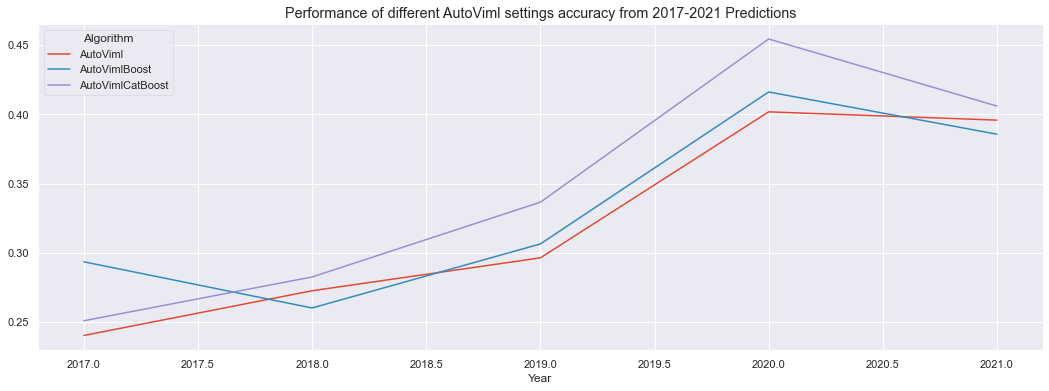

In [92]:
# yearly accuracy results
df = vis1.pivot(index = 'Year', columns = 'Algorithm', values = 'Accuracy')
df.plot(figsize = (18, 6), title = 'Performance of different AutoViml settings accuracy from 2017-2021 Predictions')

In [93]:
cols = df.columns
for i in range(len(cols)):
    print(str(i + 1) +'. Mean Accuracy of ' + str(cols[i]) + " is " + str(df[cols[i]].mean()) + "\n")

1. Mean Accuracy of AutoViml is 0.3214976357189941

2. Mean Accuracy of AutoVimlBoost is 0.3324956803620215

3. Mean Accuracy of AutoVimlCatBoost is 0.34621479696067814



In [96]:
cb = vis1.loc[vis1['Algorithm'] == 'AutoVimlCatBoost']
cb

,Algorithm,Year,Accuracy,MAE,RMSE,MAPE
2,AutoVimlCatBoost,2021,0.41,"51,883.26","180,810.56",0.22
5,AutoVimlCatBoost,2020,0.45,"40,177.22","128,456.61",0.20
8,AutoVimlCatBoost,2019,0.34,"46,186.66","118,736.08",0.21
11,AutoVimlCatBoost,2018,0.28,"60,218.32","151,558.82",0.29
14,AutoVimlCatBoost,2017,0.25,"56,587.03","149,701.31",0.28


In [98]:
valuess = pd.DataFrame(cb[['RMSE', 'MAE', 'Accuracy', 'MAPE']].mean())
valuess.rename(columns={0: 'Averages'}, inplace = True)
valuess.style.format("{:.3f}")

,Averages
RMSE,145852.676
MAE,51010.500
Accuracy,0.346
MAPE,0.241
